# K-Ortalamalar ( K-Means )

![alt text](pngs/14.png)

hedef değişken olmadığı için benzer özelliklere sahip verileri kümelere sokuyoruz

çalışma mantığı:
adım_1: kullanıcı k adet küme sayısı belirler
adım_2: k tane rastgele olacak şekilde küme merkezi atanır
adım_3: her bir veri en yakında atanmış merkez noktasına en yakın olacak şekilde(mesela öklit mesafe ile) kümeye atanır ve ilk küme oluşur
adım_4: her küme için kümedeki tüm noktaların ortalaması alınır ve yeni küme merkezi bu ortalama nokta atanır
adım_5: Her veri noktası ile en yakın küme merkezi arasındaki toplam hata (SSE - Sum of Squared Errors) hesaplanır. Küme merkezleri, veri noktalarının güncellenmiş ortalamalarına göre iteratif olarak değiştirilir. Bu işlem, küme merkezleri artık değişmeyene veya hata belirli bir eşik değerin altına inene kadar devam eder.

In [105]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder

# amerikadaki eyaletlere göre suç oranlarını incelemek istersek
df = pd.read_csv("datasets/USArrests.csv", index_col=0)


# gözlemler için
df.head()
df.isnull().sum()
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


In [106]:
# uzaklık temelli ve gradient descent temelli yöntemlerde standartlaştırmayı kullanmalıyız
sc = MinMaxScaler((0, 1)) # min max scaler tercih ettik
df = sc.fit_transform(df)
df[0:5] # gözlem için

kmeans = KMeans(n_clusters=4, random_state=17).fit(df) # modeli kurduk 4 küme istedik
kmeans.get_params() # parametreler

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 'auto',
 'random_state': 17,
 'tol': 0.0001,
 'verbose': 0}

In [107]:
kmeans.cluster_centers_ # kümelerin merkezleri neresiymiş bakalım
# 4x4 lük matris
# İlk sütun (X koordinatı)
# İkinci sütun (Y koordinatı)
# Üçüncü sütun (Z koordinatı)
# Dördüncü sütun (W koordinatı - ek boyut)

array([[0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.30439405, 0.32937147, 0.70588235, 0.31098951],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408]])

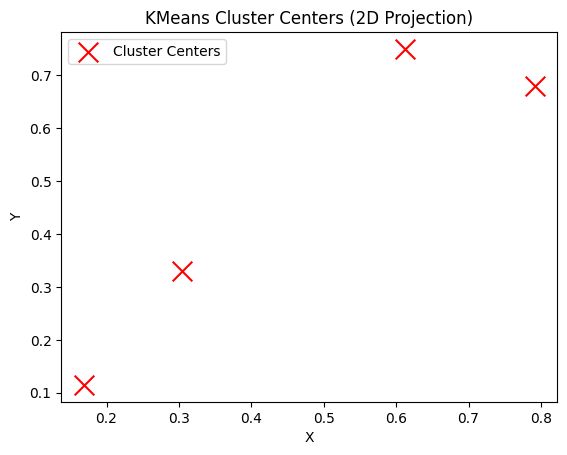

In [108]:
import matplotlib.pyplot as plt
import numpy as np

# KMeans küme merkezleri
centroids = np.array([
    [0.1686747 , 0.11485774, 0.34028683, 0.12601868],
    [0.6124498 , 0.75      , 0.75423729, 0.67980189],
    [0.30439405, 0.32937147, 0.70588235, 0.31098951],
    [0.79141566, 0.6802226 , 0.36864407, 0.36466408]
])

# 2D Scatter Plot (Sadece X ve Y)
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=200, label='Cluster Centers')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("KMeans Cluster Centers (2D Projection)")
plt.legend()
plt.show()


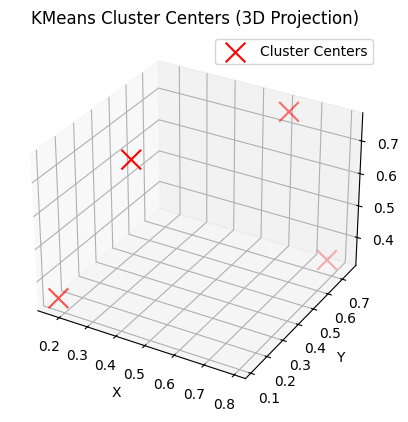

In [109]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 3D Scatter Plot (X, Y, Z)
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], color='red', marker='x', s=200, label='Cluster Centers')

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("KMeans Cluster Centers (3D Projection)")
plt.legend()
plt.show()


In [110]:
kmeans.inertia_ # sum of squared distance hata metriği yani merkeze uzaklıklar

3.6834561535859134

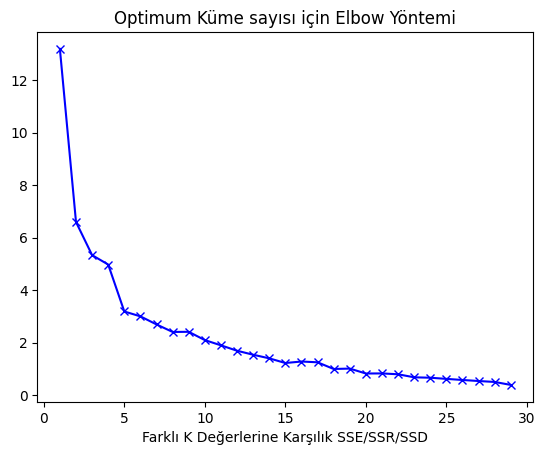

In [111]:
################################
# Optimum Küme Sayısının Belirlenmesi
################################

kmeans = KMeans() # en optimum küme sayısı için
ssd = []
K = range(1, 30)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(df)
    ssd.append(kmeans.inertia_)


plt.plot(K, ssd, "bx-")
plt.xlabel("Farklı K Değerlerine Karşılık SSE/SSR/SSD")
plt.title("Optimum Küme sayısı için Elbow Yöntemi")
plt.show()

# küme sayısı arttıkça ssd yani hatamız azalıyor bu normaldir 
# mesela gözlem sayısı kadar küme koysaydık her gözlem verisi aynı zamanda küme merkezi olacağından ve mesafeler 0 olacağından hata 0 olurdu
# burası sadece fikir vermelidir gerçek hayattaki problemlere göre küme sayısı belirlenmeli
# örnek senaryo 81 il içinde 10 bölgeye fabrika dağıtım merkezi kurulacak 
# mesela istanbul mega şehir kümeden çıkartmak gerekir istanbulun kendi bağımsız dağıtım ağı olmalı
# gibi düşüncelerle hareket edilmeli yani sadece olay veri değil çoğunluklada iş mantığı

# grafikte 5 ideal gibi duruyor

In [112]:
# from yellowbrick.cluster import KElbowVisualizer

# kmeans = KMeans()
# elbow = KElbowVisualizer(kmeans, k=(2, 20))
# elbow.fit(df)
# elbow.show()

# elbow.elbow_value_

In [113]:
################################
# Final Cluster'ların Oluşturulması
################################

# bende conda sanal ortamda sorun var o yüzden yellowbrick çalışmıyor bu yüzden uğraşmamak için optimum noktayı manuel giriyorum
# girmek istediğim ise şuydu --> n_clusters=elbow.elbow_value_
kmeans = KMeans(n_clusters=5).fit(df)

kmeans.n_clusters
kmeans.cluster_centers_
kmeans.labels_
df[0:5]

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512]])

In [114]:
# çıktıda merkez koordinatları var fakat bunlar hangi eyaletler bilmiyorum o yüzden etiketleme yapalım

clusters_kmeans = kmeans.labels_

df = pd.read_csv("datasets/USArrests.csv", index_col=0) # tekrardan verisetini okutuyoruz

df["cluster"] = clusters_kmeans

df.head(10)

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,4
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,3
California,9.0,276,91,40.6,0
Colorado,7.9,204,78,38.7,0
Connecticut,3.3,110,77,11.1,3
Delaware,5.9,238,72,15.8,3
Florida,15.4,335,80,31.9,0
Georgia,17.4,211,60,25.8,4


In [115]:
df["cluster"] = df["cluster"] + 1 # bu sadece 0. klass gözükmesin onun yerine 1. class gözüksün diye

df[df["cluster"]==5] # mesela 5. kümede kimler var

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,5
Georgia,17.4,211,60,25.8,5
Louisiana,15.4,249,66,22.2,5
Tennessee,13.2,188,59,26.9,5
Texas,12.7,201,80,25.5,5


In [116]:
# peki bu kümeler neye göre belirlenmiş inceleyelim
df.groupby("cluster").agg(["count","mean","median"])

# mesela 1. kümede 4 eyalet var cinayet ortalamaları 3 yine 5. kümede cinayet ortalaması 5
# 3. ve 4. kümedekilerin cinayet ortalamaları yüksek
# bunların kümelere gelme sebebi bütün faktörler fakat kararı verirken suç oranlarında cinayet önleme daha önemliyse 
# bu benzer kümeleri aynı kümeye katabiliriz
# ki taciz önlemede çok önemli bu verisetinde cinayet oranları yakın olan kümedeki eyaletlerin taciz oranlarıda yakın


# gözlemleri çıkartmak istersek ---> df.to_csv("clusters.csv")

Murder                   Assault                    UrbanPop                    Rape                  
         count       mean median   count        mean median    count       mean median count       mean median
cluster                                                                                                       
1           11  10.809091  11.10      11  269.727273  263.0       11  76.181818   80.0    11  34.345455  32.10
2           11   2.981818   2.60      11   73.636364   72.0       11  51.181818   53.0    11  11.409091  11.20
3            3  14.500000  14.40       3  291.666667  279.0        3  45.666667   45.0     3  18.566667  17.10
4           20   6.115000   6.15      20  140.050000  147.0       20  70.800000   71.0    20  19.050000  19.15
5            5  14.380000  13.20       5  217.000000  211.0        5  64.600000   60.0     5  24.320000  25.50


---

# Hiyerarşik Kümeleme Analizi ( Hierarchical Cluster Analysis )


![alt text](pngs/15.png)

bunun k-means den farkı dendrogram yardımıyla küme sayısını belirleyebiliyorsun
görseldeki gibi ikiye ayrılır
agglomerative(birleştirici) = küçük kümeler aşamalı olarak birleştirilir
divisive(bölümleyici) = büyük küme küçük parçalara ayrılır
daha yavaş çalışır ama aykırı değerleri dendrogramda tek başına bir küme olarak bırakabilir
hiyerarşik kümeleme her zaman aynı sonucu verir çünkü belirli bir hiyerarşik düzen oluşturuyor

agglomerative kümede kendi içinde 4 e ayrılır

Tek Bağ (Single Linkage)

    İki küme arasındaki en yakın noktaların mesafesini kullanır.
    Küçük kümeler oluşturur, ancak zincirleme etki nedeniyle uzun, ince kümeler oluşabilir.
    Gürültüye duyarlıdır.
    Avantaj: Doğal kümelenme yapısını koruyabilir.
    Dezavantaj: Zincirleme bağlantılar nedeniyle dengesiz kümeler oluşabilir.

Tam Bağ (Complete Linkage)

    İki küme arasındaki en uzak noktaların mesafesini kullanır.
    Küme içindeki noktalar birbirine daha çok benzer olur.
    Daha dengeli kümeler oluşturur ama bazen küçük kümeler oluşturma eğilimindedir.
    Avantaj: Küme içinde benzerliği artırır.
    Dezavantaj: Aykırı değerlerden daha fazla etkilenebilir.

Ortalama Bağ (Average Linkage)

    İki küme arasındaki noktalar arasındaki ortalama mesafeyi kullanır.
    Tek bağ ve tam bağ arasındaki bir yaklaşımdır.
    Avantaj: Denge sağlar.
    Dezavantaj: Karmaşıklığı biraz artırabilir.

Ward Yöntemi

    Küme içi varyansı (hata karesi toplamını) minimize etmeye çalışır.
    Küme içindeki noktaların benzerliğini artırır.
    Genellikle en iyi kümelenme sonuçlarını veren yöntemdir.
    Avantaj: Dengeli ve anlamlı kümeler oluşturur.
    Dezavantaj: Hesaplama maliyeti yüksektir.

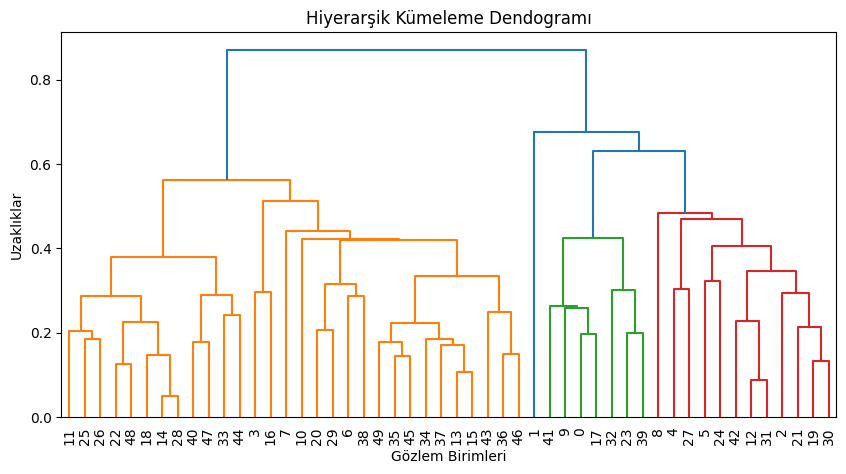

In [117]:
################################
# Hierarchical Clustering
################################

df = pd.read_csv("datasets/USArrests.csv", index_col=0)

sc = MinMaxScaler((0, 1))
df = sc.fit_transform(df)

hc_average = linkage(df, "average") # bağlantı olarak ortalamayı seçtik (öklit mesafesi)

plt.figure(figsize=(10, 5))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_average,
           leaf_font_size=10)
plt.show()

# burada kendisi 4 küme göstermiş ama biz istediğimiz veriyi kümeleyebiliriz istersek 2 küme istersek 10 küme yapabiliriz

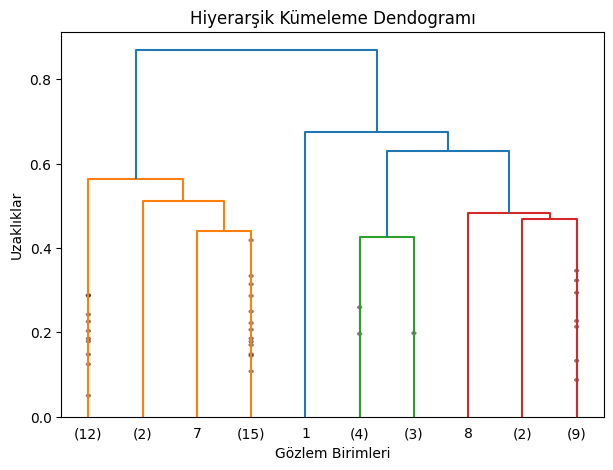

In [118]:
plt.figure(figsize=(7, 5))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_average,
           truncate_mode="lastp",
           p=10,
           show_contracted=True,
           leaf_font_size=10)
plt.show()

# daha toplu halde görmek için

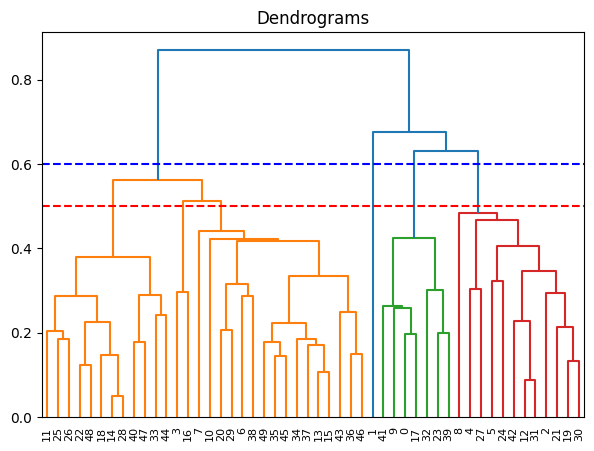

In [119]:
################################
# Kume Sayısını Belirlemek
################################


plt.figure(figsize=(7, 5))
plt.title("Dendrograms")
dend = dendrogram(hc_average)
plt.axhline(y=0.5, color='r', linestyle='--') # mesela y=0.5 den çizmek istersem 6 adet küme var
plt.axhline(y=0.6, color='b', linestyle='--') # y=0.6 için 4 küme var
# 0.5 i seçelim
plt.show()

In [120]:
################################
# Final Modeli Oluşturmak
################################

from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=6, linkage="average") # küme sayısını 6 girdik

clusters = cluster.fit_predict(df)

# veriyi tekrardan okutup etiketlememizi yapalım

df = pd.read_csv("datasets/USArrests.csv", index_col=0)
df["hi_cluster_no"] = clusters

df["hi_cluster_no"] = df["hi_cluster_no"] + 1

In [121]:
df["hi_cluster_no"] # hangi veri hangi kümede etiketiyle görüyoruz

Alabama           4
Alaska            6
Arizona           1
Arkansas          3
California        1
Colorado          1
Connecticut       2
Delaware          2
Florida           1
Georgia           4
Hawaii            2
Idaho             5
Illinois          1
Indiana           2
Iowa              5
Kansas            2
Kentucky          3
Louisiana         4
Maine             5
Maryland          1
Massachusetts     2
Michigan          1
Minnesota         5
Mississippi       4
Missouri          1
Montana           5
Nebraska          5
Nevada            1
New Hampshire     5
New Jersey        2
New Mexico        1
New York          1
North Carolina    4
North Dakota      5
Ohio              2
Oklahoma          2
Oregon            2
Pennsylvania      2
Rhode Island      2
South Carolina    4
South Dakota      5
Tennessee         4
Texas             1
Utah              2
Vermont           5
Virginia          2
Washington        2
West Virginia     5
Wisconsin         5
Wyoming           2


---

# Temel Bileşen Analizi ( Principal Component Analysis )

çok değişkenli verinin ana özelliklerini daha az sayıda değişkenle temsil etmek demektir
yani küçük miktar bilgi kaybını göze alıp değişken boyutunu azaltmak
PCA'nın amacı veri kaybını minimize ederek boyut indirgemek olsa da, her zaman küçük miktar bilgi kaybı olmaz. Veri kaybı, korunan varyans oranına bağlıdır.

### örneğin:
![alt text](pngs/16.png)

3 boyutlu olan veriyi pca yöntemi ile 2 boyuta düşürebiliyoruz oluşan veri kaybının önemi düşüktür PCA, düşük varyanslı bileşenleri (genellikle gürültüyü içeren bileşenleri) elimine ettiği için gürültüyü azaltmaya yardımcı olabilir.
tabi pca yönteminin birçok farklı kullanım amacı vardır mesela görüntü işlemede yüz tanıma modeline bakarken yüzün haricindeki verileri okumamasını sağlayabiliriz
Eğer veriniz doğrusal olmayan yapılar içeriyorsa, Kernel PCA gibi yöntemler daha iyi sonuç verebilir.

örnek:  Metrekare ve Oda Sayısı arasında çok güçlü bir ilişki varsa o zaman PCA bu iki değişkeni tek bir bileşen altında toplayabilir. Böylece fazladan veri kullanmak yerine daha az değişkenle aynı bilgiyi temsil edebilir

!!! psa amaç değil araçtır yani bunu başka modellerde kullanmak için oluştururuz

In [122]:
################################
# Principal Component Analysis
################################

df = pd.read_csv("datasets/hitters.csv")
df.head()

# bu verisetinin amacı beyzbol oyuncularının özelliklerine göre maaş tahmini yapmasıdır fakat unsupervized learning öğrendiğimiz için
# bağımlı değişken ile işimiz yok onu çıkartalım

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [123]:
num_cols = [col for col in df.columns if df[col].dtypes != "O" and "Salary" not in col]

df[num_cols].head()

df = df[num_cols]
df.dropna(inplace=True)
df.shape

# şimdi elimizde 16 adet değişken var amacımız bu çok değişkenli verinin daha az değişkenle ifade edilmesi

df = StandardScaler().fit_transform(df) # yine bu yöntemde standartlaştırma istiyor

pca = PCA() # modeli kurduk
pca_fit = pca.fit_transform(df)

# artık yeni bileşenlerimiz var fakat bu bileşenlerin başarı metriği bir tanedir oda varyans oranı

In [124]:
pca.explained_variance_ratio_
# bunlar pca nın 16 adet bileşeninin açıkladığı varyans oranları

array([4.60378552e-01, 2.60398491e-01, 1.03388605e-01, 5.36902121e-02,
       4.20784091e-02, 2.96359092e-02, 1.57079101e-02, 1.13928108e-02,
       7.83230398e-03, 5.87669497e-03, 3.74765194e-03, 3.09384056e-03,
       1.55679403e-03, 8.59034766e-04, 2.86873704e-04, 7.59064046e-05])

In [125]:
np.cumsum(pca.explained_variance_ratio_) # bu bileşenler bir araya geldiğinde toplamda ne kadar varyans oranına sahip
# ilk bileşen tek başına verinin %46 sını açıklamış zaten
# ikinci bileşenle bir araya geldiklerinde %72 açıklanmış

array([0.46037855, 0.72077704, 0.82416565, 0.87785586, 0.91993427,
       0.94957018, 0.96527809, 0.9766709 , 0.9845032 , 0.9903799 ,
       0.99412755, 0.99722139, 0.99877819, 0.99963722, 0.99992409,
       1.        ])

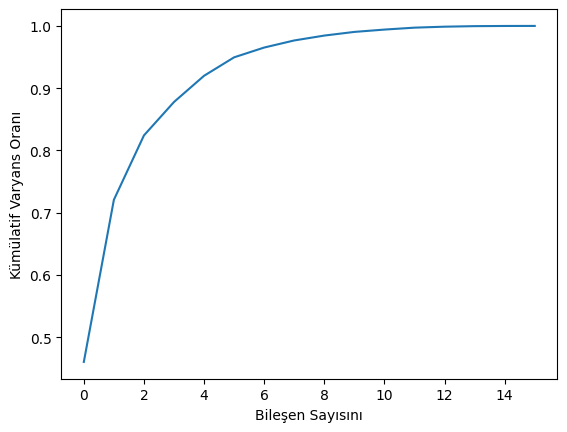

In [126]:
################################
# Optimum Bileşen Sayısı
################################
# yine grafiğe dökerekte incelenebilir

# sadece 3 bileşen verinin yüzde 82 sini açıklamış 

pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Bileşen Sayısını")
plt.ylabel("Kümülatif Varyans Oranı")
plt.show()

In [127]:
################################
# Final PCA'in Oluşturulması
################################

pca = PCA(n_components=3) # yani önceki verideki bilginin yüzde 82 si yeterli diyerek en iyi componenti 3 girdik
pca_fit = pca.fit_transform(df)

pca.explained_variance_ratio_
np.cumsum(pca.explained_variance_ratio_)

array([0.46037855, 0.72077704, 0.82416565])

In [128]:
################################
# BONUS: Principal Component Regression
################################

# Diyelim ki Hitters veri setini doğrusal bir modelle açıklayacağız.
# Ancak değişkenler arasında çoklu doğrusal bağlantı (multicollinearity) var ve bu, modelin performansını olumsuz etkiliyor.
# PCA, değişkenleri bağımsız bileşenlere dönüştürerek bu sorunu çözer.


df = pd.read_csv("datasets/hitters.csv")
df.shape

num_cols = [col for col in df.columns if df[col].dtypes != "O" and "Salary" not in col]
len(num_cols)

others = [col for col in df.columns if col not in num_cols]

print(others) # verisetinden çıkardığımız değişkenler bunlardı

pd.DataFrame(pca_fit, columns=["PC1","PC2","PC3"]).head() # bizim 16 değişkenden 3 taneye düşürdüklerimizde bunlar

# PCR yani Principal Component Regression, PCA ile elde edilen bağımsız bileşenleri kullanarak regresyon modeli kurmamızı sağlar.
# Böylece değişkenler arasındaki çoklu doğrusal bağlantı sorununu gidererek daha kararlı bir model oluşturabiliriz


['League', 'Division', 'Salary', 'NewLeague']


,PC1,PC2,PC3
0,-3.240106,0.253173,0.776066
1,0.245488,-1.302951,0.118040
2,0.603883,2.617002,-0.698183
3,3.591276,-0.547821,-1.049022
4,-2.264528,0.698898,-1.290536


In [129]:
final_df = pd.concat([pd.DataFrame(pca_fit, columns=["PC1","PC2","PC3"]), # şimdide çıkarttığımız verilerle pca verilerini birleştirelim
                      df[others]], axis=1)
final_df.head()
# korelasyonu pca ile kırdık zaten onu artık düşünmeye gerek yok
# sonrasında klasik regresyon modeli kurulumu

,PC1,PC2,PC3,League,Division,Salary,NewLeague
0,-3.240106,0.253173,0.776066,A,E,NaN,A
1,0.245488,-1.302951,0.118040,N,W,475.0,N
2,0.603883,2.617002,-0.698183,A,W,480.0,A
3,3.591276,-0.547821,-1.049022,N,E,500.0,N
4,-2.264528,0.698898,-1.290536,N,E,91.5,N


In [130]:
################################
# BONUS: PCA ile Çok Boyutlu Veriyi 2 Boyutta Görselleştirme
################################

################################
# Breast Cancer
################################

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

df = pd.read_csv("datasets/breast_cancer.csv") # meme kanseri verisi var bunlar normalde görüntüden numerik değer çıkarımı veriseti

y = df["diagnosis"] # bağımlı değişken
X = df.drop(["diagnosis", "id"], axis=1)

In [133]:
# üstteki işlemleri otomatik yapan fonksiyon 
# meme kanseri setinde 30 değişken vardı artık 2 tane olacak
def create_pca_df(X, y):
    X = StandardScaler().fit_transform(X)
    pca = PCA(n_components=2)
    pca_fit = pca.fit_transform(X)
    pca_df = pd.DataFrame(data=pca_fit, columns=['PC1', 'PC2'])
    final_df = pd.concat([pca_df, pd.DataFrame(y)], axis=1)
    return final_df

pca_df = create_pca_df(X, y)
pca_df

,PC1,PC2,diagnosis
0,9.192837,1.948583,M
1,2.387802,-3.768172,M
2,5.733896,-1.075174,M
3,7.122953,10.275589,M
4,3.935302,-1.948072,M
...,...,...,...
564,6.439315,-3.576817,M
565,3.793382,-3.584048,M
566,1.256179,-1.902297,M
567,10.374794,1.672010,M


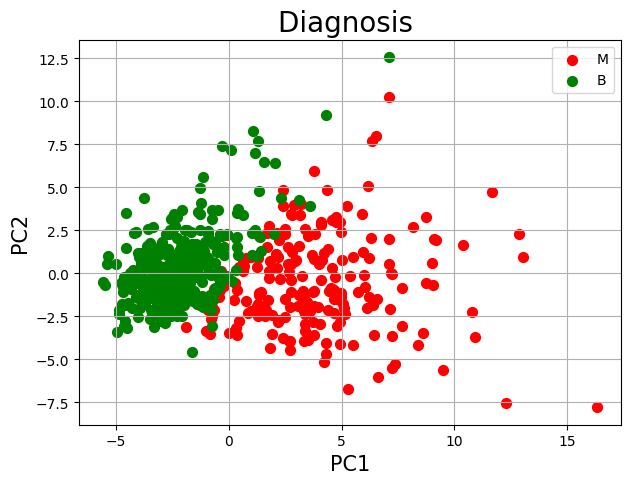

In [134]:
def plot_pca(dataframe, target):
    fig = plt.figure(figsize=(7, 5))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel('PC1', fontsize=15)
    ax.set_ylabel('PC2', fontsize=15)
    ax.set_title(f'{target.capitalize()} ', fontsize=20)

    targets = list(dataframe[target].unique())
    colors = random.sample(['r', 'b', "g", "y"], len(targets))

    for t, color in zip(targets, colors):
        indices = dataframe[target] == t
        ax.scatter(dataframe.loc[indices, 'PC1'], dataframe.loc[indices, 'PC2'], c=color, s=50)
    ax.legend(targets)
    ax.grid()
    plt.show()

plot_pca(pca_df, "diagnosis")

# birsürü değişken içinden iki boyutlu 2 değişkenli kolay yorumlanabilir bir grafik elde ettik
# daha sonra sınıflandırmalarda kullanılabilir

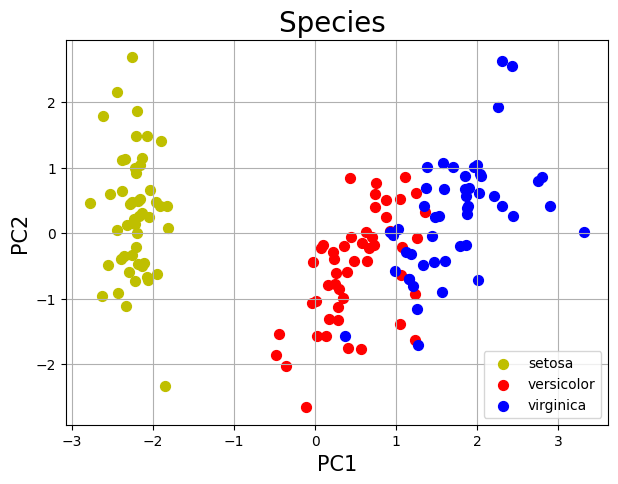

In [135]:
################################
# Iris
################################

import seaborn as sns
df = sns.load_dataset("iris")

y = df["species"]
X = df.drop(["species"], axis=1)

pca_df = create_pca_df(X, y)

plot_pca(pca_df, "species")

# iris verisetinde 3 adet çiçek cinsiyeti vardı onları birsürü değişken arasından görselleştirdik

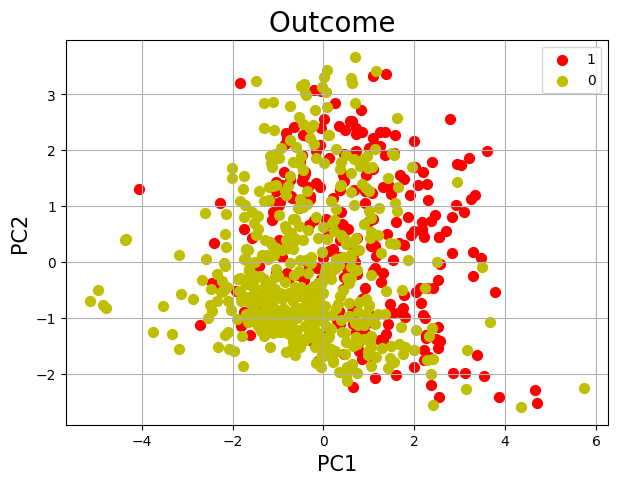

In [136]:
################################
# Diabetes
################################

df = pd.read_csv("datasets/diabetes.csv")

y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

pca_df = create_pca_df(X, y)

plot_pca(pca_df, "Outcome")
# bu sınıflandırmada zor olur veriler iç içe geçmiş